# How to use this notebook

You can just load the jsonl file containing the results with the first cell. Then running the notebook sequentially will create plots which might be of interest.

# Load jsonl file

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Replace with your filename
jsonl_file = "predictions.jsonl"

records = []
with open(jsonl_file, "r", encoding="utf-8") as f:
    for line in f:
        records.append(json.loads(line))

df = pd.DataFrame(records)


# Extract useful fields

Here more more features are created


In [8]:

df["esa_score"] = df["esa_score"].astype(float)
df["chrf"] = df["metrics"].apply(lambda x: x.get("chrf", None))
df["src_length"] = df["src"].apply(lambda x: len(x))
df["esa_bin"] = df["esa_bin"].astype(str)


# Create plots


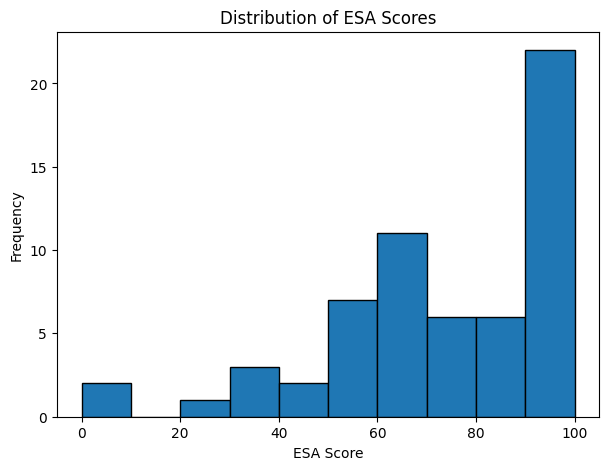

In [ ]:
# Histogram of ESA scores
plt.figure(figsize=(7,5))
plt.hist(df["esa_score"], bins=10, edgecolor="black")
plt.xlabel("ESA Score")
plt.ylabel("Frequency")
plt.title("Distribution of ESA Scores")
#plt.savefig("plot_esa_hist.png", dpi=150)
plt.show()


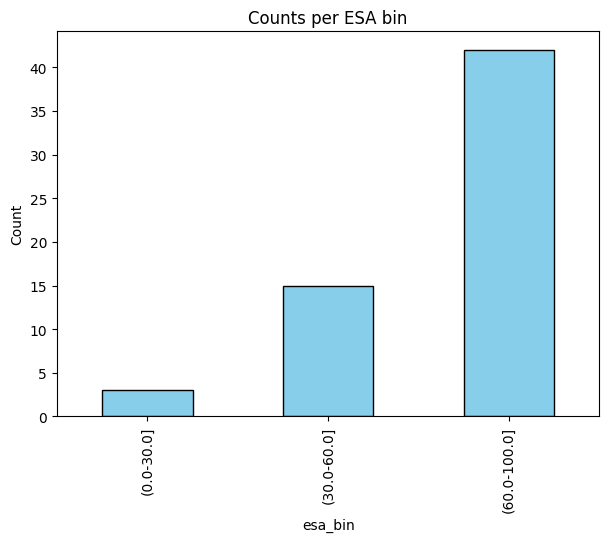

In [ ]:
# Counts per ESA bin
plt.figure(figsize=(7,5))
df["esa_bin"].value_counts().sort_index().plot(kind="bar", color="skyblue", edgecolor="black")
plt.ylabel("Count")
plt.title("Counts per ESA bin")
#plt.savefig("plot_esa_bin_counts.png", dpi=150)
plt.show()

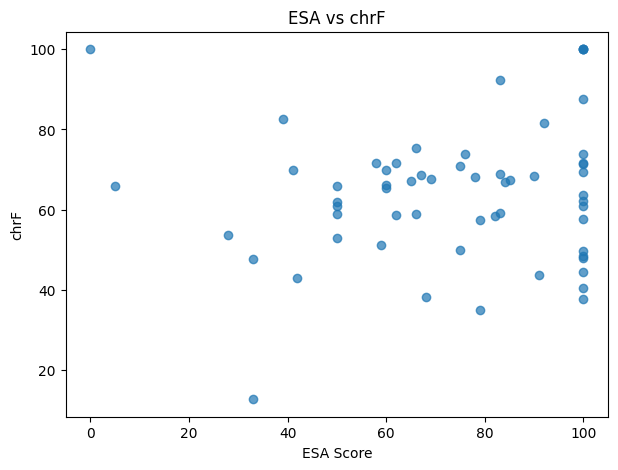

In [10]:
# ESA vs chrF scatter
plt.figure(figsize=(7,5))
plt.scatter(df["esa_score"], df["chrf"], alpha=0.7)
plt.xlabel("ESA Score")
plt.ylabel("chrF")
plt.title("ESA vs chrF")
# plt.savefig("plot_esa_vs_chrf.png", dpi=150)
plt.show()

<Figure size 800x600 with 0 Axes>

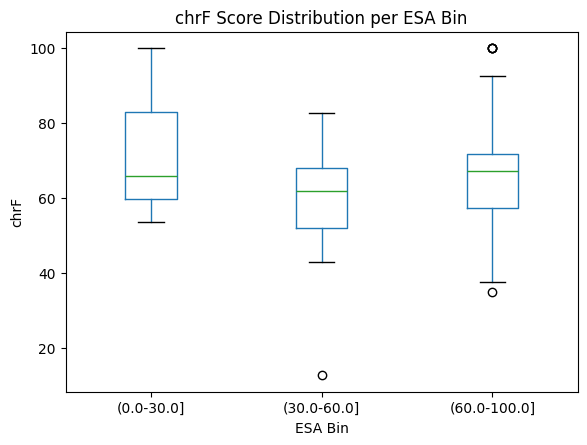

In [ ]:
# ----------------------------
# chrF distribution per ESA bin as box plot
# ----------------------------
plt.figure(figsize=(8,6))
df.boxplot(column="chrf", by="esa_bin", grid=False)
plt.ylabel("chrF")
plt.xlabel("ESA Bin")
plt.title("chrF Score Distribution per ESA Bin")
plt.suptitle("")  # remove default Pandas boxplot title
#plt.savefig("plot_chrf_per_bin.png", dpi=150)
plt.show()


/tmp/ipython-input-2343046498.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,


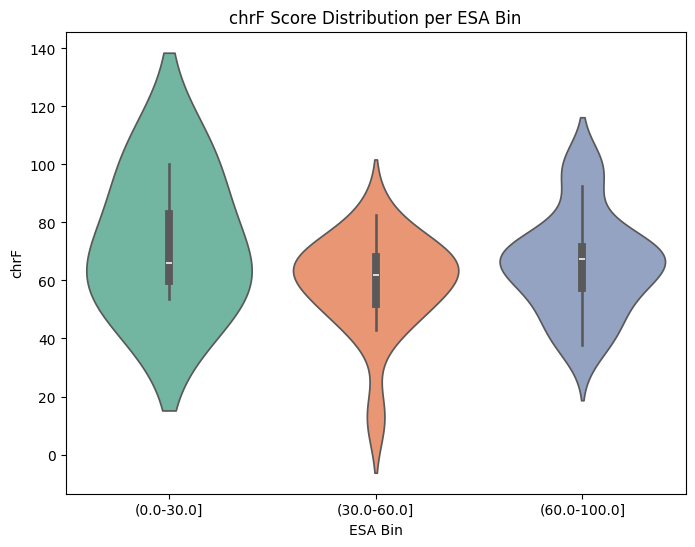

In [6]:
import seaborn as sns

# ----------------------------
# chrF distribution per ESA bin (Violin Plot)
# ----------------------------
plt.figure(figsize=(8,6))
sns.violinplot(data=df,
               x="esa_bin",
               y="chrf",
               inner="box",
               palette="Set2",
               order=["(0.0-30.0]", "(30.0-60.0]", "(60.0-100.0]"]  # specify desired order
)
plt.ylabel("chrF")
plt.xlabel("ESA Bin")
plt.title("chrF Score Distribution per ESA Bin")
#plt.savefig("plot_chrf_per_bin_violin.png", dpi=150)
plt.show()


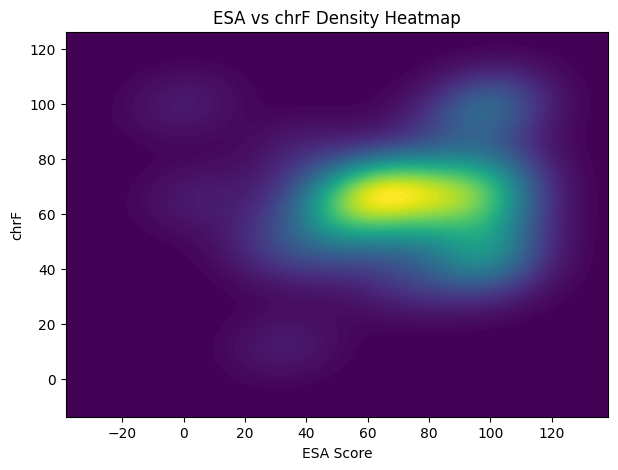

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------
# ESA vs chrF density heatmap
# ----------------------------

plt.figure(figsize=(7,5))
sns.kdeplot(
    x=df["esa_score"],
    y=df["chrf"],
    fill=True,        # fill the density
    cmap="viridis",   # color map for heat
    thresh=0,         # show full density
    levels=100        # smoothness of contour
)
plt.xlabel("ESA Score")
plt.ylabel("chrF")
plt.title("ESA vs chrF Density Heatmap")
#plt.savefig("plot_esa_vs_chrf_heatmap.png", dpi=150)
plt.show()


/tmp/ipython-input-549618088.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


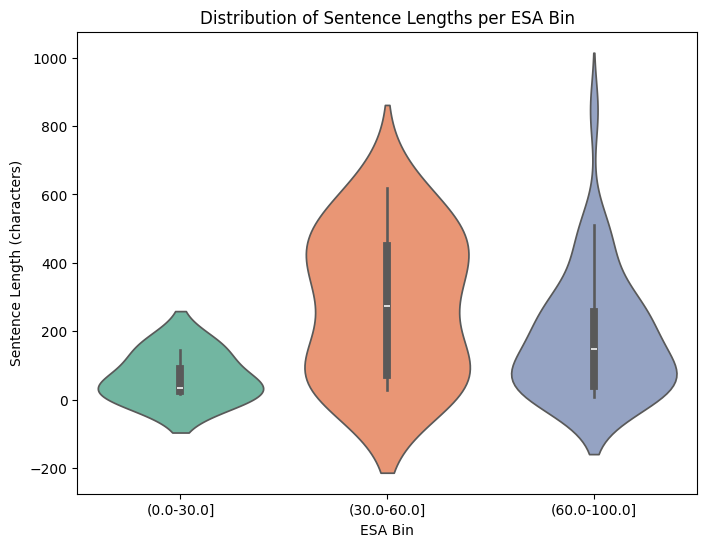

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# Distribution of src Sentence Lengths per ESA Bin
# ----------------------------

plt.figure(figsize=(8,6))
sns.violinplot(
    data=df,
    x="esa_bin",
    y="src_length",
    inner="box",   # shows mini boxplot inside violin
    palette="Set2",
    order=sorted(df["esa_bin"].unique())  # optional: order bins
)
plt.ylabel("Sentence Length (characters)")
plt.xlabel("ESA Bin")
plt.title("Distribution of Sentence Lengths per ESA Bin")
#plt.savefig("sentence_length_per_bin_violin.png", dpi=150)
plt.show()


# Some more stats

In [12]:
# Aggregate statistics per ESA bin
chrf_stats_per_bin = df.groupby("esa_bin")["chrf"].agg(
    count="count",
    mean="mean",
    std="std",
    min="min",
    q25=lambda x: x.quantile(0.25),
    median="median",
    q75=lambda x: x.quantile(0.75),
    max="max"
).reset_index()

print(chrf_stats_per_bin)


        esa_bin  count       mean        std        min        q25     median  \
0    (0.0-30.0]      3  73.221306  23.986365  53.706452  59.831959  65.957466   
1   (30.0-60.0]     15  58.727263  16.324312  12.724615  52.054155  61.861968   
2  (60.0-100.0]     42  65.615030  17.170537  34.975411  57.483978  67.317026   

         q75        max  
0  82.978733  100.00000  
1  67.953579   82.71776  
2  71.647658  100.00000  


## Per Model Analysis